In [404]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns


df=pd.read_csv('boston.csv')


In [405]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [406]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


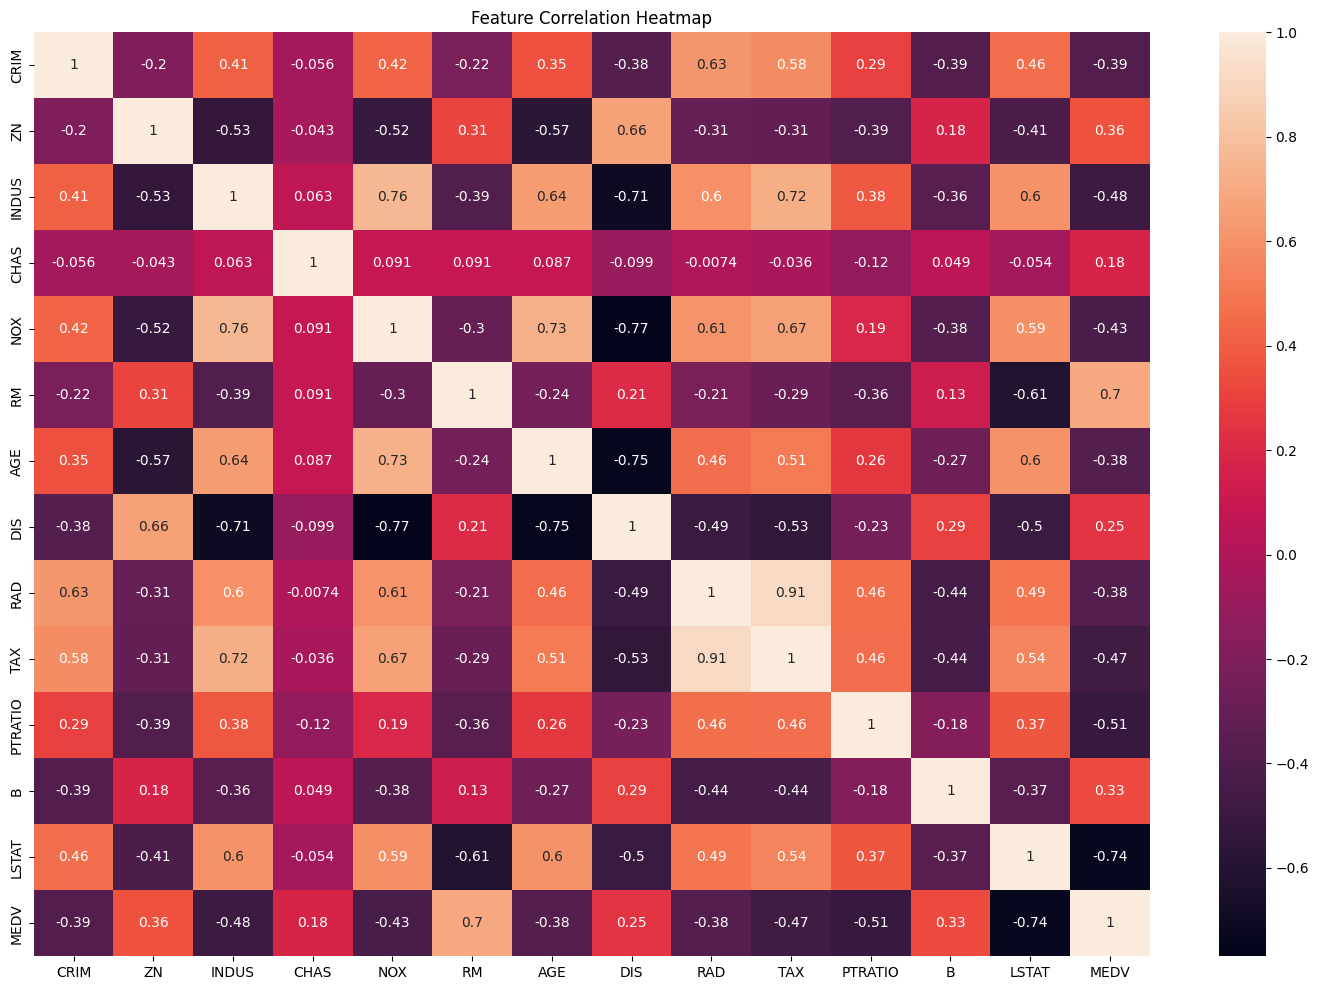

In [407]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot=True,)
plt.title('Feature Correlation Heatmap')
plt.show()

In [408]:
x_train, x_test, y_train, y_test = train_test_split(df[['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']], df['MEDV'], test_size=0.2, random_state=42)

In [409]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [410]:
print(model.score(x_test, y_test))

0.619668354740563


In [411]:
mean_squared_error(y_test, model.predict(x_test))

27.891158402464423

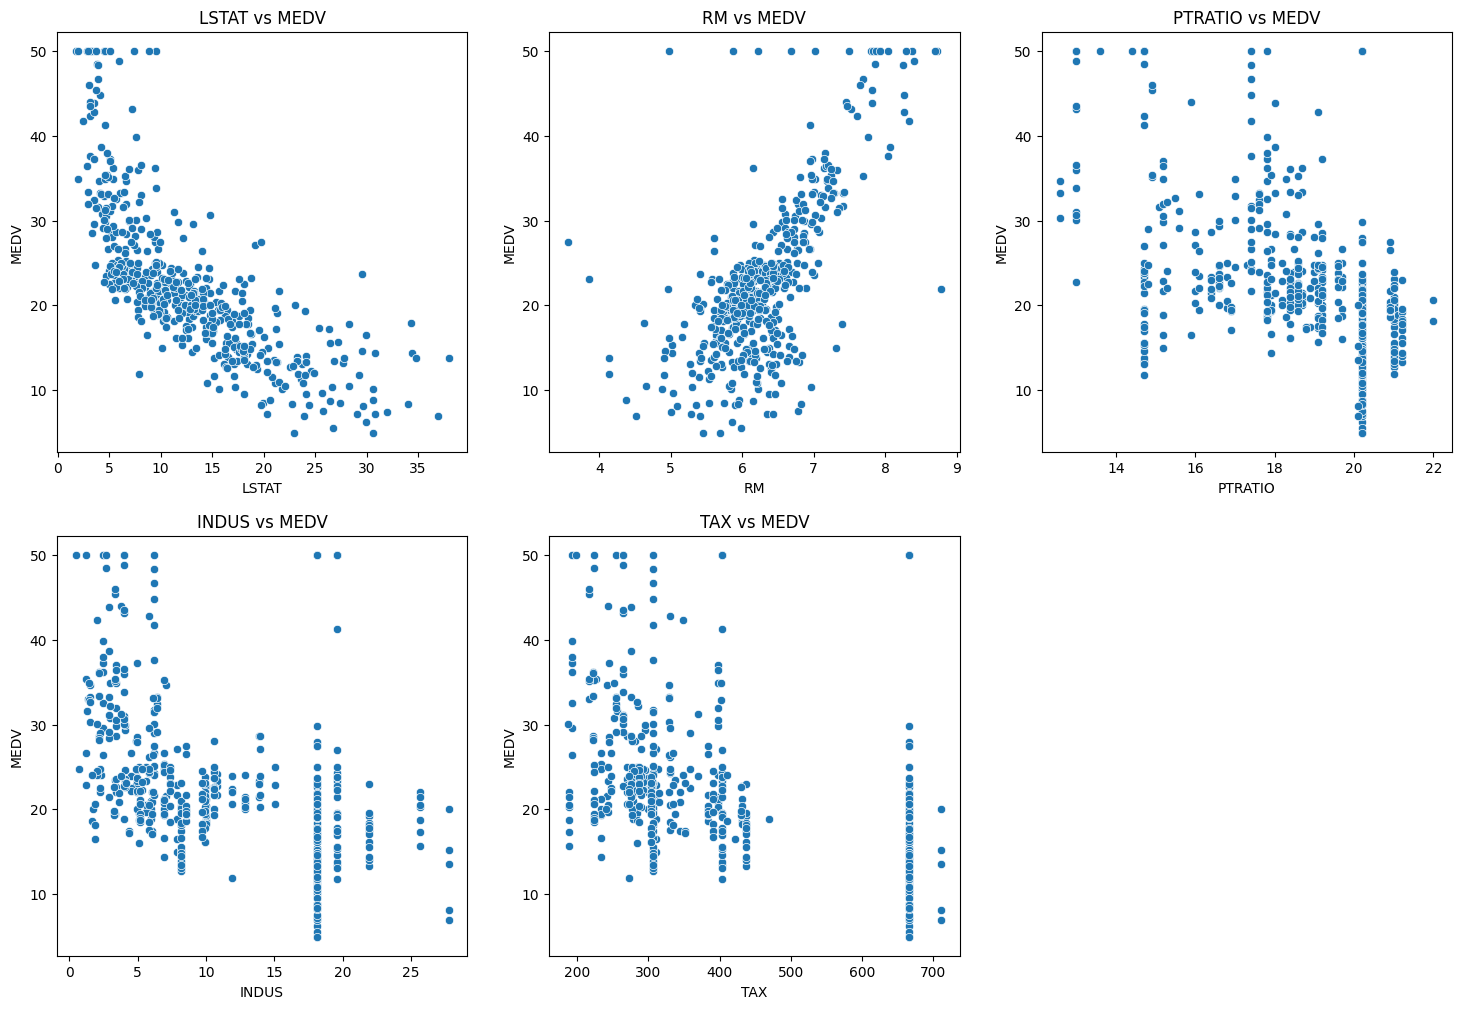

In [412]:
selected_features = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']
target = 'MEDV'

plt.figure(figsize=(18, 12))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=feature, y=target)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)

plt.show()


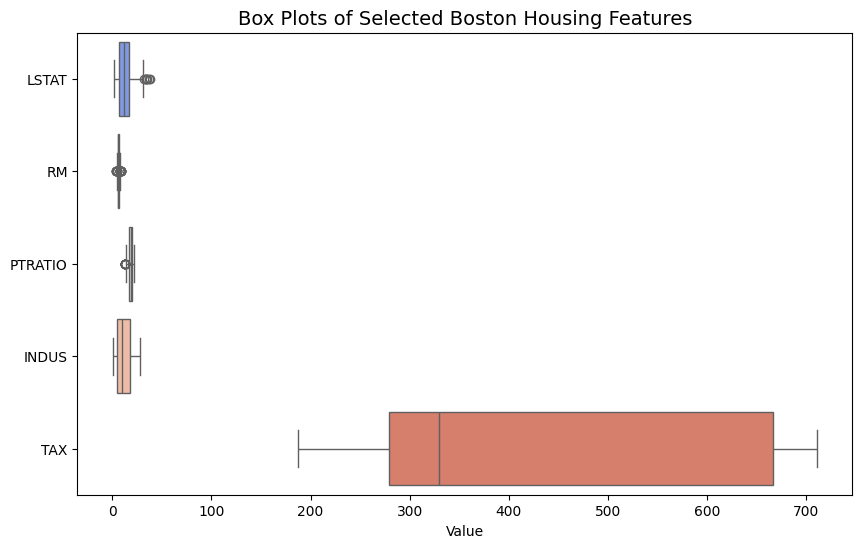

In [413]:
selected_features = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[selected_features], orient='h', palette='coolwarm')
plt.title('Box Plots of Selected Boston Housing Features', fontsize=14)
plt.xlabel('Value')
plt.show()


In [414]:
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.45 * IQR
        upper_bound = Q3 + 1.45 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

selected_features = ['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX', 'NOX']
df_cleaned = remove_outliers_iqr(df, selected_features)

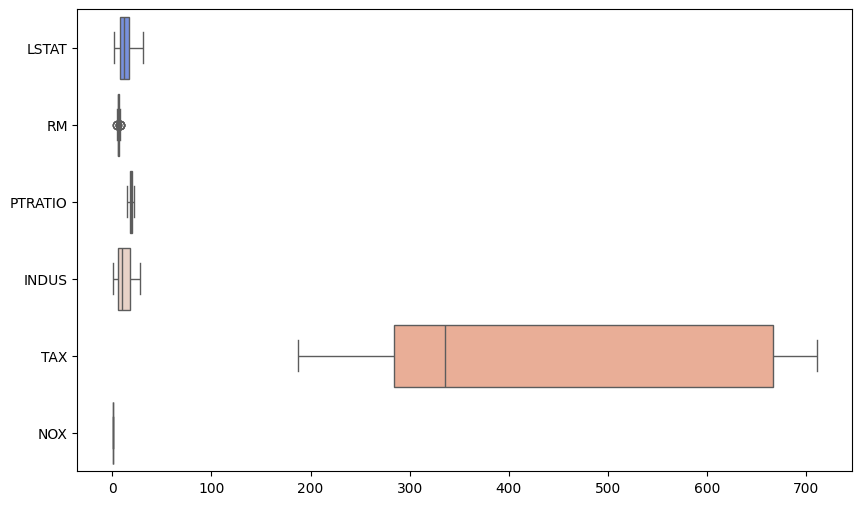

In [415]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned[selected_features], orient='h', palette='coolwarm')
plt.show()

In [416]:
x_train, x_test, y_train, y_test = train_test_split(df_cleaned[['LSTAT', 'RM', 'PTRATIO', 'INDUS', 'TAX']], df_cleaned['MEDV'], test_size=0.2,random_state=42)

In [417]:
scaler= MinMaxScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [418]:
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train_scaled)
X_poly_test = poly.transform(X_test_scaled)

model = LinearRegression()
model.fit(X_poly_train, y_train)
predicted=model.predict(X_poly_test)

print("Score", model.score(X_poly_test, y_test))

Score 0.8833379794428785


In [419]:
mse = mean_squared_error(y_test, predicted)
print("MSE:",int(mse))

MSE: 6


In [421]:
import joblib
joblib.dump(model, 'boston_model2.pkl')
joblib.dump(poly, 'poly_features.pkl')
joblib.dump(scaler, 'scaler_boston1.pkl')

['scaler_boston1.pkl']

In [424]:
import numpy as np
import joblib

# Load trained model and preprocessing tools
model = joblib.load('boston_model2.pkl')
scaler = joblib.load('scaler_boston1.pkl')         # Use the same scaler used in training
poly = joblib.load('poly_features.pkl')    # Optional, if used

# Create one test case: [LSTAT, RM, PTRATIO, INDUS, TAX]
test_input = np.array([[5.0, 6.0, 15.0, 5.0, 30000.0]])

# Scale and transform (if used in training)
scaled_input = scaler.transform(test_input)
transformed_input = poly.transform(scaled_input)  # Remove if not using poly

# Predict
prediction = model.predict(transformed_input)[0]

print(f"Predicted house price: ${prediction * 1000:.2f}")


Predicted house price: $-11752013962.05


c:\Users\Hashir\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [425]:
scaled_input

array([[1.12448418e-01, 3.98434721e-01, 4.10958904e-02, 1.41562854e-01,
        5.68950382e+01]])

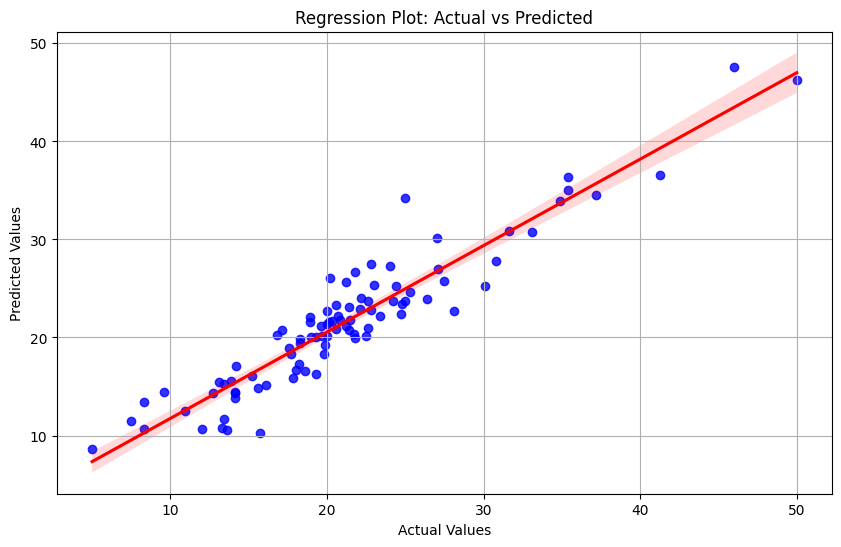

In [374]:

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=predicted, marker='o', color='blue', line_kws={'color': 'red'})
plt.title('Regression Plot: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()
